## 1. Creating Embeddings

In [24]:
import csv
import seaborn as sns
from scipy import spatial
import numpy as np
from sklearn.preprocessing import StandardScaler
from sentence_transformers import SentenceTransformer
import umap.umap_ as umap
import matplotlib.pyplot as plt
from collections import defaultdict


In [99]:

# Read attendees and their responses from a CSV file, replace attendees.csv with own link or file name
sentences = []

with open('simple_sentences.csv', newline='') as csvfile:
    file = csv.reader(csvfile, delimiter=',', quotechar='"')
    next(file)  # Skip the header row
    for row in file:
      sentences.append(row[0])
    
sentences

['The sun rises in the east.',
 'Cats often sleep during the day.',
 'Apples are usually red or green.',
 'A book sits on the shelf.',
 'The car is parked in the driveway.',
 'She wore a bright red dress.',
 'Birds fly south for the winter.',
 'The clock struck midnight.',
 'A gentle breeze blew through the trees.',
 'He drank a cup of tea.',
 'The stars twinkle in the night sky.',
 'Water boils at 100 degrees Celsius.',
 'The child played with a blue ball.',
 'She baked a chocolate cake.',
 'The dog barked loudly.',
 'A rainbow appeared after the rain.',
 'He read the newspaper every morning.',
 'The train arrived at the station.',
 'The room was painted blue.',
 'She cut the paper with scissors.',
 'The moon orbits the Earth.',
 'He typed on the computer keyboard.',
 'The tree lost its leaves in autumn.',
 'They went for a walk in the park.',
 'The baby smiled at her mother.',
 'The phone rang at noon.',
 'He planted a tree in the yard.',
 'The fish swam in the pond.',
 'She wore a n

In [54]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
# paragraphs = list(ppl_map.keys())
embeddings = model.encode(sentences)
    
# Create a dictionary to store embeddings for each person
sen_map = {sen: embedding for sen, embedding in zip(sentences, embeddings)}
sen_map

{'The sun rises in the east.': array([ 1.68072106e-03,  9.22534689e-02,  9.04901847e-02,  5.86197302e-02,
        -2.36147223e-03, -1.85707118e-02,  6.36206102e-03, -5.16577177e-02,
         6.86496571e-02,  1.42802102e-02,  5.45887724e-02, -6.19535713e-05,
        -5.49919147e-04,  2.73756329e-02,  8.18339512e-02,  4.65316931e-03,
        -4.18731989e-03, -8.08368400e-02,  7.86847086e-04, -6.96365386e-02,
        -5.92560060e-02, -6.90107718e-02,  2.84617487e-02,  7.69954175e-02,
        -1.45502447e-03,  1.17404899e-02, -1.27093820e-02,  5.71511984e-02,
        -2.72401720e-02, -4.87743964e-04,  1.12681147e-02,  3.45331058e-02,
        -6.23201467e-02,  1.61181465e-02, -3.95568535e-02,  5.09664714e-02,
         6.87695816e-02, -7.19268024e-02,  8.08343664e-02,  4.15828452e-02,
        -2.76225936e-02, -1.05458386e-01, -4.38662916e-02,  6.00425005e-02,
        -4.89305332e-03,  1.54586714e-02, -4.42035571e-02,  7.90291727e-02,
         8.09104666e-02, -6.52290462e-03,  1.63463727e-02,

In [57]:
import umap.umap_ as umap

# Reducing dimensionality of embedding data, scaling to coordinate domain/range
reducer = umap.UMAP()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(list(sen_map.values()))
reduced_data = reducer.fit_transform(scaled_data)

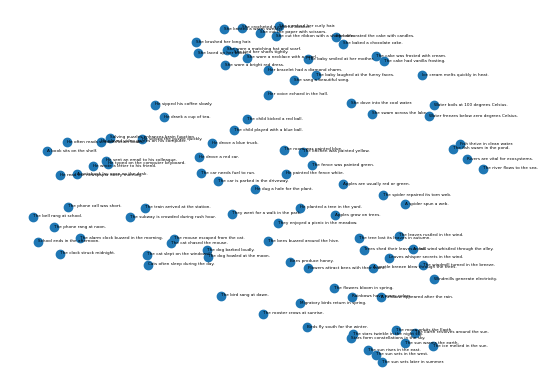

In [59]:
# Creating lists of coordinates with accompanying labels
x = [row[0] for row in reduced_data]
y = [row[1] for row in reduced_data]
label = list(sen_map.keys())

# Plotting and annotating data points
plt.scatter(x,y)
for i, name in enumerate(label):
    plt.annotate(name, (x[i], y[i]), fontsize="3")

# Clean-up and Export
plt.axis('off')
plt.savefig('visualization.png', dpi=800)


In [5]:
# Read attendees and their responses from a CSV file, replace attendees.csv with own link or file name
# sentences = []
ppl_map = {}

with open('ppl.csv', newline='') as csvfile:
    file = csv.reader(csvfile, delimiter=',', quotechar='"')
    next(file)  # Skip the header row
    for row in file:
      name, personality, i = row
      ppl_map[personality] = name
      # sentences.append(row[0])
    
# sentences
ppl_map

{"To sum up, Braeden, you're passionate about leveraging the power of AI to connect people and foster discussion, and you relish the ongoing challenges presented by both complex coding problems and the dynamic world of rock climbing.": 'Braeden',
 "Ransford, it's been really enlightening chatting with you. From our conversation, I would say your personality and interests revolve around dynamic storytelling, strategic thinking, and imaginative worlds, whether you're rolling dice as a gnome werebadger, creating your own literary universe, or competitively playing fighting games.": 'Ransford',
 "Fantastic, Isaiah! I'm glad that resonates with you. It's been a pleasure talking about your interests. If there's ever a new book, game, or tech innovation you want to discuss, or anything else for that matter, feel free to come back and chat with me. Enjoy your next sci-fi adventure!": 'Isaiah',
 'Sister is a contemplative and inquisitive soul who cherishes the expansion of mind and spirit throu

In [15]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
paragraphs = list(ppl_map.keys())
embeddings = model.encode(paragraphs)
    
# Create a dictionary to store embeddings for each person
person_map = {ppl_map[paragraph]: embedding for paragraph, embedding in zip(paragraphs, embeddings)}
embeddings.shape

(8, 384)

In [17]:
import umap.umap_ as umap

# Reducing dimensionality of embedding data, scaling to coordinate domain/range
reducer = umap.UMAP(n_neighbors=4)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(list(person_map.values()))
# len(person_map.values())
reduced_data = reducer.fit_transform(scaled_data)

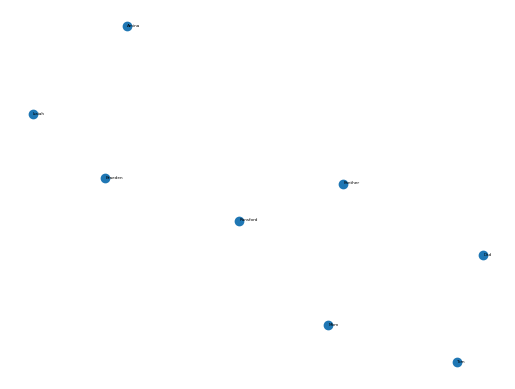

In [18]:
import matplotlib.pyplot as plt
# Creating lists of coordinates with accompanying labels
x = [row[0] for row in reduced_data]
y = [row[1] for row in reduced_data]
label = list(person_map.keys())

# Plotting and annotating data points
plt.scatter(x,y)
for i, name in enumerate(label):
    plt.annotate(name, (x[i], y[i]), fontsize="3")

# Clean-up and Export
plt.axis('off')
plt.savefig('visualization.png', dpi=800)


## 3. [BONUS] Providing top matches

In [20]:
from collections import defaultdict
top_matches = {}
all_personal_pairs = defaultdict(list)
for person in ppl_map.values():
    for person1 in ppl_map.values():
        all_personal_pairs[person].append([spatial.distance.cosine(person_map[person1], person_map[person]), person1])

for person in ppl_map.values():
    top_matches[person] = sorted(all_personal_pairs[person], key=lambda x: x[0])

print(top_matches['Braeden'])


[[0, 'Braeden'], [0.7136737406253815, 'Isaiah'], [0.7555095553398132, 'Ransford'], [0.7600911408662796, 'Tom'], [0.7746822983026505, 'Dad'], [0.8053243458271027, 'Mom'], [0.8399198204278946, 'Amina'], [0.8954229429364204, 'Panther']]


make sure to keep its responses short
ask less questions

In [94]:
def load_ppl():
  person_to_interests_map = {}

  with open('ppl.csv', newline='') as csvfile:
      file = csv.reader(csvfile, delimiter=',', quotechar='"')
      next(file)  # Skip the header row
      
      for row in file:
        name, personality, sp_id = row
        person_to_interests_map[sp_id] = (name, personality)
      
  return person_to_interests_map

def load_embeddings():
  embedding_map = {}

  with open('embeddings.csv', newline='') as csvfile:
      file = csv.reader(csvfile, delimiter=',', quotechar='"')
      next(file)  # Skip the header row
      
      for row in file:
        sp_id, embedding = row
        embedding_map[sp_id] = np.fromstring(embedding, sep=',')
      
  return embedding_map

def get_interest_embedding(interest_list):
  model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
  embeddings = model.encode(interest_list)
      
  return embeddings


def create_visualization(person_interest_map):
  embeddings = np.array(list(load_embeddings().values()))

  reducer = umap.UMAP(n_neighbors=4)
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(embeddings)

  reduced_data = reducer.fit_transform(scaled_data)
  
  xs = [row[0] for row in reduced_data]
  ys = [row[1] for row in reduced_data]
  
  plt.scatter(xs, ys)
  for i, (name, _) in enumerate(list(person_interest_map.values())):
    plt.annotate(name, (xs[i], ys[i]))
  
  plt.axis('off')
  plt.savefig('visualization.png')
  
def provide_top_matches(person_interest_map, n_mactches=5):
  embeddings = np.array(list(load_embeddings().values()))

  embeddings_map = {sp_id: (name, embedding) for (sp_id, (name, _)), embedding in zip(person_interest_map.items(), embeddings)}

  top_matches = {}
  all_personal_pairs = defaultdict(list)
  
  ids = list(person_interest_map.keys())
  for id1 in ids:
    for id2 in ids:
        all_personal_pairs[id1].append([spatial.distance.cosine(embeddings_map[id1][1], embeddings_map[id2][1]), person_interest_map[id2][0]])

  for sp_id in ids:
    top_matches[sp_id] = sorted(all_personal_pairs[sp_id], key=lambda x: x[0])
    
  return {sp_id: matches[:n_mactches] for sp_id, matches in top_matches.items()}

In [88]:
pi_map = load_data()
embs = get_interest_embedding([interest for _, interest in list(pi_map.values())])

with open('embeddings.csv', 'w', newline='') as f:
  writer = csv.writer(f, delimiter=',', quotechar='"')
  writer.writerow(['id', 'embedding'])
  for sp_id, embedding in zip(pi_map.keys(), embs):
    writer.writerow([sp_id, np.array2string(embedding, separator=',').replace('\n', '').strip('[]')])
    
# embs

In [100]:
get_interest_embedding(sentences)

array([[ 0.00168072,  0.09225347,  0.09049018, ..., -0.00386195,
        -0.05938189,  0.03753839],
       [ 0.09863874,  0.02057864,  0.01799278, ...,  0.08295618,
        -0.01384603,  0.02520745],
       [ 0.05401269, -0.00490966, -0.02935013, ..., -0.01147154,
         0.10002293,  0.05071887],
       ...,
       [ 0.02735514,  0.00463621,  0.01784906, ...,  0.04913504,
         0.04217878, -0.03967299],
       [ 0.06064402,  0.0512567 ,  0.05498782, ...,  0.02019924,
         0.08650485, -0.07627767],
       [-0.05334567,  0.0348557 ,  0.02838654, ..., -0.02393339,
         0.01021852,  0.01889356]], dtype=float32)

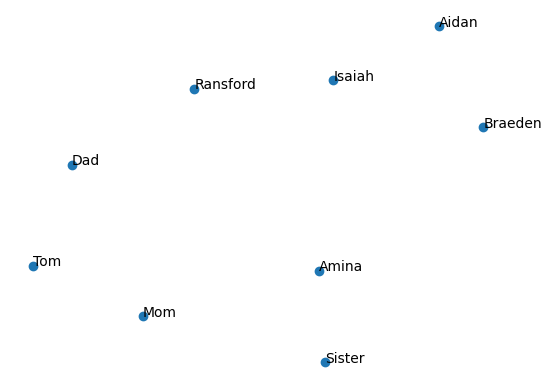

In [96]:
pi_map = load_data()
create_visualization(pi_map)
# provide_top_matches(pi_map)

In [58]:
matches = provide_top_matches(pi_map)
matches["sp8"]

[[0, 'Aidan'],
 [0.48260241746902466, 'Isaiah'],
 [0.5865389704704285, 'Braeden'],
 [0.6121303737163544, 'Ransford'],
 [0.7112170159816742, 'Dad']]